In [2]:
#import modules

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
#Read in data file
boston =  pd.read_csv("Boston_Housing_Red_4160.csv")
boston_no = boston
boston.head(),boston.shape,boston_no.shape

(     RM   DIS  Price
 0  6.57  4.09   24.0
 1  6.42  4.97   21.6
 2  7.18  4.97   34.7
 3  7.00  6.06   33.4
 4  7.15  6.06   36.2, (498, 3), (498, 3))

In [4]:
# Create features and target 

feature_cols = ["RM","DIS"]

X = boston[feature_cols]
y = boston["Price"]
X.head(),y.head()

(     RM   DIS
 0  6.57  4.09
 1  6.42  4.97
 2  7.18  4.97
 3  7.00  6.06
 4  7.15  6.06, 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: Price, dtype: float64)

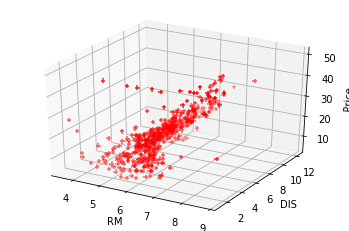

In [5]:
# Visualize data set

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



# Create figure object
fig = plt.figure()

# Get the current axes, creating one if necessary.
ax = fig.add_subplot(111, projection='3d')

# Set labels according to axis
plt.xlabel('RM')
plt.ylabel('DIS')
ax.set_zlabel('Price')
                   
# Make legend
a,b = X[feature_cols]
ax.scatter(X[a],X[b],y, c = 'r', marker = '+')

plt.show()

In [6]:
# import required modules

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# create model

linreg = LinearRegression()

In [8]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# fit data to model and predict
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [10]:
print('Coefficients: \n', linreg.coef_,'Intercept: \n',linreg.intercept_) #Co-efficients of the linear equation

Coefficients: 
 [8.66571114 0.48611454] Intercept: 
 -33.65991544970683


In [11]:
# print errors

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 35.02
Variance score: 0.53


In [12]:
# Learning curves and x-validation

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [13]:
train_sizes = [1, 100, 200,290]

In [14]:
# using the learning curve function to plot the learning curves
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
train_sizes, train_scores, validation_scores = learning_curve(
estimator = linreg,
X=X,
y=y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error') #mse by itself is not available for this function, convert the negative values later

In [15]:
# Cross validation based training and test scores 

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-20.93401292  -9.21132335  -9.21132335  -9.21132335  -9.21132335]
 [-16.95012752 -11.99236084 -16.30218268 -16.30218268 -16.30218268]
 [-42.55284211 -37.59128301 -40.60819898 -15.63758043 -15.63758043]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -61.7359      -88.1707     -116.969       -90.66070707 -103.88686869]
 [ -14.93547473  -30.45001264  -21.94609672 -103.14044954  -57.77588055]
 [ -12.6430257   -22.02657568  -13.51160047 -108.03516169  -85.93315812]
 [ -12.99240498  -28.70395947  -23.52579106 -106.74686095  -91.17740326]]


In [16]:

# Calculate mean values of scores to plot
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
100    11.555861
200    15.569807
290    30.405497
dtype: float64

 --------------------

Mean validation scores

 1      92.284635
100    45.649583
200    48.429904
290    52.629284
dtype: float64


(0, 100)

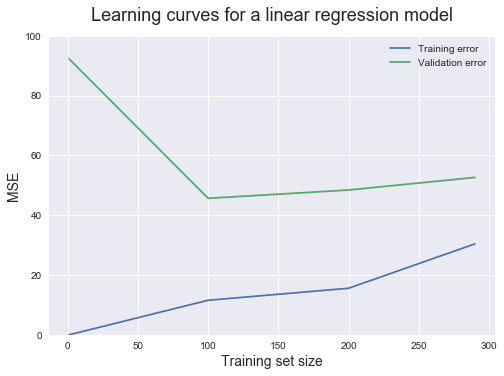

In [17]:
# Plot learning curves

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100)

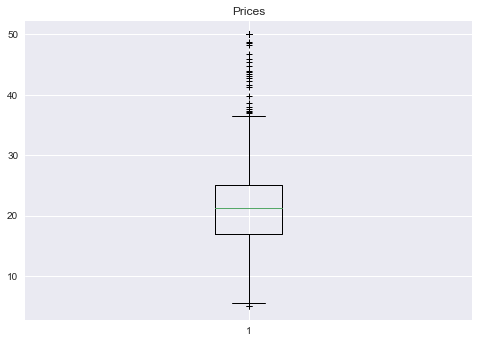

In [18]:
# Check for outliears in data set. Fixing random state for reproducibility

np.random.seed(19680801)

fig1, ax1 = plt.subplots()
ax1.set_title('Prices')
ax1.boxplot(y,flierprops = dict(markerfacecolor ='g', marker = '+'))
#ax1.boxplot(X['DIS'],flierprops = dict(markerfacecolor ='g', marker = '+'))
plt.show()

In [19]:
# identify outliers

from scipy import stats
z = np.abs(stats.zscore(y))
threshold = 1
outliers = (np.where(z >1))

In [20]:
# Extract the values of the outliers. Check max and min

outlier =[]
for o in outliers:
    outlier.append(y[o])
print(np.max(outlier),np.min(outlier))  

50.0 5.0


In [21]:
# Remove rows of outliers from the data set

boston_no.drop(boston.index[outliers], inplace=True)
boston_no.shape

(369, 3)

In [22]:
# Split the new data set
 
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(boston_no[feature_cols], boston_no['Price'], test_size=0.2, random_state=42)

In [23]:
# Create a new model

linreg_no = LinearRegression()

In [24]:
# Fit and Predict

linreg_no.fit(X_train_no,y_train_no)
y_pred_no = linreg_no.predict(X_test_no)

In [25]:
print('Coefficients: \n', linreg_no.coef_,'Intercept: \n', linreg.intercept_)  # Coefficients of the linear equation

Coefficients: 
 [3.93354662 0.45290661] Intercept: 
 -33.65991544970683


In [26]:
# print errors

print("Mean squared error: %.2f"
      % mean_squared_error(y_test_no, y_pred_no))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_no, y_pred_no))

Mean squared error: 14.15
Variance score: 0.14


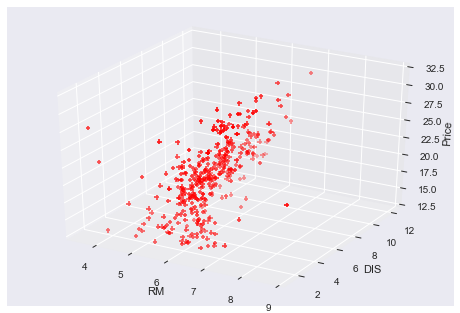

In [27]:
# Visualize new data set with minimized outliers


# Create figure object
fig2 = plt.figure()

# Get the current axes, creating one if necessary.
ax2 = fig2.add_subplot(111, projection='3d')

# Set labels according to axis
plt.xlabel('RM')
plt.ylabel('DIS')
ax2.set_zlabel('Price')
                   
# Make legend

ax2.scatter(boston_no['RM'],boston_no['DIS'],boston_no['Price'], c = 'r', marker = '+')

plt.show()

In [28]:
# Plot the learning curves for the new data set

train_sizes, train_scores, validation_scores = learning_curve(
estimator = linreg_no,
X=boston_no[feature_cols],
y=boston_no['Price'], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [29]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [ -7.01417142 -10.65337409  -7.51955276  -7.51955276  -7.51955276]
 [ -7.87109309  -7.83392514  -7.02925286  -9.83655944  -9.83655944]
 [-15.0326651  -16.06147695 -12.42330756 -14.86475079  -8.24544433]]

 ----------------------------------------------------------------------

Validation scores:

 [[-20.35067568 -28.81459459 -15.40837838 -15.64621622 -48.04657534]
 [-34.78153648 -10.63533706 -15.61142402 -19.96478592 -39.9669119 ]
 [-10.20249357 -13.23810881 -14.57985896 -16.81586133 -40.46541306]
 [-11.90218361  -7.40648151 -26.17427669 -12.65208634 -44.09298268]]


In [30]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
100     8.045241
200     8.481478
290    13.325529
dtype: float64

 --------------------

Mean validation scores

 1      25.653288
100    24.191999
200    19.060347
290    20.445602
dtype: float64


(0, 40)

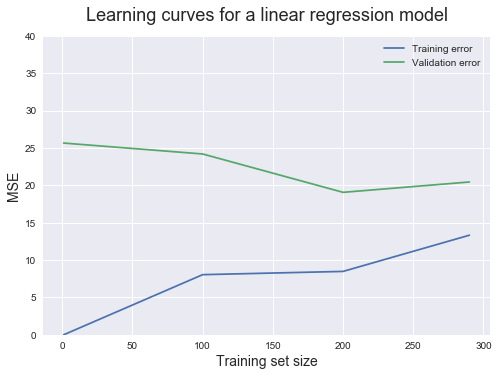

In [31]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)